In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("pacific.csv")
df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pacific_data = df.copy()
pacific_data_2 = df.copy()

In [6]:
import datetime as dt

pacific_data['Date'] = pd.to_datetime(pacific_data['Date'] , format= '%Y%m%d')

pacific_data['Month'] = pacific_data['Date'].apply(lambda m: m.month) # Extracting the month and storing it to a new variable

pacific_data['Year'] = pacific_data['Date'].apply(lambda y: y.year)

In [7]:
list(pacific_data.columns)

['ID',
 'Name',
 'Date',
 'Time',
 'Event',
 'Status',
 'Latitude',
 'Longitude',
 'Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW',
 'Month',
 'Year']

In [8]:
pacific_data = pacific_data[['ID',
 'Name',
 'Date','Month',
 'Year',
 'Time',
 'Event',
 'Status',
 'Latitude',
 'Longitude',
 'Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW',
 ]]
pacific_data

,ID,Name,Date,Month,Year,Time,Event,Status,Latitude,Longitude,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,6,1949,0,,TS,20.2N,106.3W,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,1949-06-11,6,1949,600,,TS,20.2N,106.4W,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,1949-06-11,6,1949,1200,,TS,20.2N,106.7W,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,1949-06-11,6,1949,1800,,TS,20.3N,107.7W,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,1949-06-12,6,1949,0,,TS,20.4N,108.6W,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,11,2015,1200,,LO,21.7N,109.0W,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,11,2015,1800,,LO,22.4N,108.7W,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,11,2015,0,,LO,23.1N,108.3W,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,11,2015,600,,LO,23.5N,107.9W,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pacific_data.columns[pacific_data.isin([-999]).any()]

Index(['Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW',
       'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [10]:
for column in pacific_data.columns:
    
    missing_cnt = pacific_data[column][pacific_data[column] == -999].count()
    
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Month =  0
Missing Values in column Year =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values i

In [11]:
a = 26137-12804
b = a/26137
c = b * 100
c

51.01197536059991

In [12]:
pacific_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                26137 non-null  object        
 1   Name              26137 non-null  object        
 2   Date              26137 non-null  datetime64[ns]
 3   Month             26137 non-null  int64         
 4   Year              26137 non-null  int64         
 5   Time              26137 non-null  int64         
 6   Event             26137 non-null  object        
 7   Status            26137 non-null  object        
 8   Latitude          26137 non-null  object        
 9   Longitude         26137 non-null  object        
 10  Maximum Wind      26137 non-null  int64         
 11  Minimum Pressure  26137 non-null  int64         
 12  Low Wind NE       26137 non-null  int64         
 13  Low Wind SE       26137 non-null  int64         
 14  Low Wind SW       2613

 = df[ (df['Fee'] >= 22000) & (df['Discount'] == 2300)]

## Missing Values removal

In [13]:
# df.drop(df[df['Fee'] >= 24000].index, inplace = True)

pacific_data = pacific_data.loc[(pacific_data[['Minimum Pressure','Low Wind NE', 'Low Wind SE', 'Low Wind SW',
       'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW']] >= 0).all(axis=1)]

In [14]:
pacific_data.drop(['ID','Event'], axis=1, inplace=True)
pacific_data

,Name,Date,Month,Year,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
19744,AGATHA,2004-05-22,5,2004,0,TD,14.7N,107.6W,25,1006,...,0,0,0,0,0,0,0,0,0,0
19745,AGATHA,2004-05-22,5,2004,600,TD,15.4N,108.5W,30,1006,...,0,0,0,0,0,0,0,0,0,0
19746,AGATHA,2004-05-22,5,2004,1200,TS,16.0N,109.1W,35,1005,...,75,75,0,0,0,0,0,0,0,0
19747,AGATHA,2004-05-22,5,2004,1800,TS,16.6N,109.6W,45,1000,...,75,75,0,0,0,0,0,0,0,0
19748,AGATHA,2004-05-23,5,2004,0,TS,17.1N,109.9W,50,997,...,75,75,25,25,25,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,11,2015,1200,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,SANDRA,2015-11-28,11,2015,1800,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,SANDRA,2015-11-29,11,2015,0,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,SANDRA,2015-11-29,11,2015,600,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pacific_data["Status"].value_counts()

 TS     2061
 LO     1699
 HU     1245
 TD     1117
 DB      217
 EX       24
 SS        7
 ST        6
 PT        6
 SD        4
 HU        1
Name: Status, dtype: int64

In [16]:
26137-12804

13333

### Feature Engineering

In [17]:
# Import regular expression.

import re

## create columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.

def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Creating the column Latitude_Hemisphere.

pacific_data['Latitude_Hemisphere'] = pacific_data['Latitude'].apply(hemisphere)
pacific_data['Longitude_Hemisphere'] = pacific_data['Longitude'].apply(hemisphere)
pacific_data['Latitude_Hemisphere'] = pacific_data['Latitude_Hemisphere'].astype('category')
pacific_data['Longitude_Hemisphere'] = pacific_data['Longitude_Hemisphere'].astype('category')

# Convert the latitude and longitude Column to numeric type.

pacific_data['Latitude'] =  pacific_data['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
pacific_data['Longitude'] = pacific_data['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

In [18]:
pacific_data

,Name,Date,Month,Year,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
19744,AGATHA,2004-05-22,5,2004,0,TD,14.7,107.6,25,1006,...,0,0,0,0,0,0,0,0,0,1
19745,AGATHA,2004-05-22,5,2004,600,TD,15.4,108.5,30,1006,...,0,0,0,0,0,0,0,0,0,1
19746,AGATHA,2004-05-22,5,2004,1200,TS,16.0,109.1,35,1005,...,0,0,0,0,0,0,0,0,0,1
19747,AGATHA,2004-05-22,5,2004,1800,TS,16.6,109.6,45,1000,...,0,0,0,0,0,0,0,0,0,1
19748,AGATHA,2004-05-23,5,2004,0,TS,17.1,109.9,50,997,...,25,25,25,25,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,11,2015,1200,LO,21.7,109.0,35,1002,...,0,0,0,0,0,0,0,0,0,1
26133,SANDRA,2015-11-28,11,2015,1800,LO,22.4,108.7,30,1007,...,0,0,0,0,0,0,0,0,0,1
26134,SANDRA,2015-11-29,11,2015,0,LO,23.1,108.3,30,1008,...,0,0,0,0,0,0,0,0,0,1
26135,SANDRA,2015-11-29,11,2015,600,LO,23.5,107.9,25,1009,...,0,0,0,0,0,0,0,0,0,1


In [19]:
pacific_data.columns

Index(['Name', 'Date', 'Month', 'Year', 'Time', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW',
       'Latitude_Hemisphere', 'Longitude_Hemisphere'],
      dtype='object')

In [20]:
# Rearraging the column names : 

pacific_data = pacific_data[['Name',
 'Date',
 'Month',
 'Year',
 'Time',
 'Status',
 'Latitude',
 'Longitude',
 'Latitude_Hemisphere', 
 'Longitude_Hemisphere',
 'Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW',
 ]]
pacific_data

,Name,Date,Month,Year,Time,Status,Latitude,Longitude,Latitude_Hemisphere,Longitude_Hemisphere,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
19744,AGATHA,2004-05-22,5,2004,0,TD,14.7,107.6,0,1,...,0,0,0,0,0,0,0,0,0,0
19745,AGATHA,2004-05-22,5,2004,600,TD,15.4,108.5,0,1,...,0,0,0,0,0,0,0,0,0,0
19746,AGATHA,2004-05-22,5,2004,1200,TS,16.0,109.1,0,1,...,75,75,0,0,0,0,0,0,0,0
19747,AGATHA,2004-05-22,5,2004,1800,TS,16.6,109.6,0,1,...,75,75,0,0,0,0,0,0,0,0
19748,AGATHA,2004-05-23,5,2004,0,TS,17.1,109.9,0,1,...,75,75,25,25,25,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,11,2015,1200,LO,21.7,109.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26133,SANDRA,2015-11-28,11,2015,1800,LO,22.4,108.7,0,1,...,0,0,0,0,0,0,0,0,0,0
26134,SANDRA,2015-11-29,11,2015,0,LO,23.1,108.3,0,1,...,0,0,0,0,0,0,0,0,0,0
26135,SANDRA,2015-11-29,11,2015,600,LO,23.5,107.9,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pacific_data1 = pacific_data.copy()

## Label Encoding


In [22]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pacific_data1['Name']  = le.fit_transform(pacific_data1['Name']) 

In [23]:
pacific_data1

,Name,Date,Month,Year,Time,Status,Latitude,Longitude,Latitude_Hemisphere,Longitude_Hemisphere,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
19744,67,2004-05-22,5,2004,0,TD,14.7,107.6,0,1,...,0,0,0,0,0,0,0,0,0,0
19745,67,2004-05-22,5,2004,600,TD,15.4,108.5,0,1,...,0,0,0,0,0,0,0,0,0,0
19746,67,2004-05-22,5,2004,1200,TS,16.0,109.1,0,1,...,75,75,0,0,0,0,0,0,0,0
19747,67,2004-05-22,5,2004,1800,TS,16.6,109.6,0,1,...,75,75,0,0,0,0,0,0,0,0
19748,67,2004-05-23,5,2004,0,TS,17.1,109.9,0,1,...,75,75,25,25,25,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,99,2015-11-28,11,2015,1200,LO,21.7,109.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26133,99,2015-11-28,11,2015,1800,LO,22.4,108.7,0,1,...,0,0,0,0,0,0,0,0,0,0
26134,99,2015-11-29,11,2015,0,LO,23.1,108.3,0,1,...,0,0,0,0,0,0,0,0,0,0
26135,99,2015-11-29,11,2015,600,LO,23.5,107.9,0,1,...,0,0,0,0,0,0,0,0,0,0


# Modelling the dataset

In [24]:
# Defining our Dependent and Independent variable in our ENCODED Dataframe

X = pacific_data1.drop(['Date',"Time",'Status'],axis=1)
y = pacific_data1['Status']

In [25]:
# Defining our Dependent and Independent variable in our non-encoded Dataframe

a = pacific_data.drop(['Name','Date',"Time",'Status'],axis=1)
b = pacific_data['Status']

In [26]:
X.shape

(6387, 21)

In [27]:
y.shape

(6387,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [30]:
a_train,a_test,b_train,b_test = train_test_split(a,b,random_state=0, test_size=0.25)

In [31]:
a.shape

(6387, 20)

In [32]:
b.shape

(6387,)

### log regression model

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy of logistic regression classifier on test set: 0.80
precision is : 0.4318677081291625
recall is : 0.381928207660089
F1 score is : 0.3841900447170007


In [34]:
##### for non encoded data #####

log_reg1 = LogisticRegression()

log_reg1.fit(a_train, b_train)

y_pred1 = log_reg1.predict(a_test)


print("\nThe accuracy score of LR model is : ", accuracy_score(b_test,y_pred1))
print("The F1 score of LR model is : ", f1_score(b_test,y_pred1,average="micro"))


The accuracy score of LR model is :  0.7570444583594239
The F1 score of LR model is :  0.7570444583594239


### knn classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
##### for encoded data ####

acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy value')

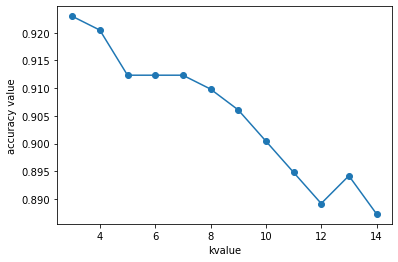

In [37]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy value')

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred =  classifier.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.9229805886036319
Precision is : 0.813370253861397
Recall is : 0.7148704478428995
F1 score is : 0.733551813573818


In [39]:
#### For non encoded data ######

acc_values1 = []
neighbors1 = np.arange(3,15)

for k in neighbors1:
    
    classifier1 = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier1.fit(a_train,b_train)
    
    y_pred_a = classifier1.predict(a_test)
    
    acc1 = accuracy_score(b_test,y_pred_a)
    acc_values1.append(acc1)

Text(0, 0.5, 'accuracy value')

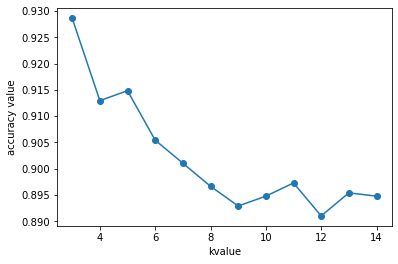

In [40]:
plt.plot(neighbors1,acc_values1,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy value')

In [41]:
classifier1a = KNeighborsClassifier(n_neighbors = 3, metric='minkowski')
classifier1a.fit(a_train, b_train)
y_pred_1 =  classifier1a.predict(a_test)

print("Accuracy is :",accuracy_score(b_test,y_pred_1))

print("Precision is :",precision_score(b_test,y_pred_1,average='macro'))

print("Recall is :",recall_score(b_test,y_pred_1,average='macro'))

print("F1 score is :",f1_score(b_test,y_pred_1,average='macro'))

Accuracy is : 0.9286161552911709
Precision is : 0.5839895600223628
Recall is : 0.6155082987131248
F1 score is : 0.5978264555489499


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
####### For encoded Data ######

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,dt_pred))
print("Precision is :",precision_score(y_test,dt_pred,average='macro'))
print("Recall is :",recall_score(y_test,dt_pred,average='macro'))
print("F1 score is :",f1_score(y_test,dt_pred,average='macro'))

Accuracy is : 0.9336255479023169
Precision is : 0.7873801999917835
Recall is : 0.795175747298838
F1 score is : 0.7870999323144389


In [45]:


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,dt_pred))
print("Precision is :",precision_score(y_test,dt_pred,average='weighted'))
print("Recall is :",recall_score(y_test,dt_pred,average='weighted'))
print("F1 score is :",f1_score(y_test,dt_pred,average='weighted'))

Accuracy is : 0.9317470256731372
Precision is : 0.9319250137661659
Recall is : 0.9317470256731372
F1 score is : 0.9316109763945303


In [46]:
###### for non encoded data #########

In [47]:
dt1 = DecisionTreeClassifier()
dt1.fit(a_train,b_train)
dt_pred1 = dt1.predict(a_test)

print("Accuracy is :",accuracy_score(b_test,dt_pred1))
print("Precision is :",precision_score(b_test,dt_pred1,average='macro'))
print("Recall is :",recall_score(b_test,dt_pred1,average='macro'))
print("F1 score is :",f1_score(b_test,dt_pred1,average='macro'))

Accuracy is : 0.9361302442078898
Precision is : 0.8426107843288074
Recall is : 0.8397345012747809
F1 score is : 0.8411376523761466


In [48]:
dt1 = DecisionTreeClassifier()
dt1.fit(a_train,b_train)
dt_pred1 = dt1.predict(a_test)

print("Accuracy is :",accuracy_score(b_test,dt_pred1))
print("Precision is :",precision_score(b_test,dt_pred1,average='weighted'))
print("Recall is :",recall_score(b_test,dt_pred1,average='weighted'))
print("F1 score is :",f1_score(b_test,dt_pred1,average='weighted'))

Accuracy is : 0.9311208515967438
Precision is : 0.9307560021476817
Recall is : 0.9311208515967438
F1 score is : 0.9309136020642236


## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
#### For Encoded Dataset ####

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,rf_pred))
print("Precision is :",precision_score(y_test,rf_pred,average='macro'))
print("Recall is :",recall_score(y_test,rf_pred,average='macro'))
print("F1 score is :",f1_score(y_test,rf_pred,average='macro'))

Accuracy is : 0.9542892924232936
Precision is : 0.953196394131353
Recall is : 0.8957893833096207
F1 score is : 0.9051143477968809


In [51]:
rf2 = RandomForestClassifier()
rf2.fit(X_train,y_train)
rf_pred2 = rf2.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,rf_pred2))
print("Precision is :",precision_score(y_test,rf_pred2,average='weighted'))
print("Recall is :",recall_score(y_test,rf_pred2,average='weighted'))
print("F1 score is :",f1_score(y_test,rf_pred2,average='weighted'))

Accuracy is : 0.9480275516593613
Precision is : 0.9476592476742803
Recall is : 0.9480275516593613
F1 score is : 0.9474489253438001


In [52]:
#### For Non Encoded dataset ####

rf1 = RandomForestClassifier()
rf1.fit(a_train,b_train)
rf_pred1 = rf1.predict(a_test)

print("Accuracy of the Model = ", accuracy_score(b_test,rf_pred1))
print("Precision is :",precision_score(b_test,rf_pred1,average='macro'))
print("Recall is :",recall_score(b_test,rf_pred1,average='macro'))
print("F1 score is :",f1_score(b_test,rf_pred1,average='macro'))

Accuracy of the Model =  0.9530369442705072
Precision is : 0.8394370737772197
Recall is : 0.8575386097372528
F1 score is : 0.8476338508616151


In [53]:
rf1a = RandomForestClassifier()
rf1a.fit(a_train,b_train)
rf_pred1a = rf1a.predict(a_test)

print("Accuracy of the Model = ", accuracy_score(b_test,rf_pred1a))
print("Precision is :",precision_score(b_test,rf_pred1a,average='weighted'))
print("Recall is :",recall_score(b_test,rf_pred1a,average='weighted'))
print("F1 score is :",f1_score(b_test,rf_pred1a,average='weighted'))

Accuracy of the Model =  0.9536631183469004
Precision is : 0.9527909353234797
Recall is : 0.9536631183469004
F1 score is : 0.9531753615447803


In [54]:
# Checking the various feature importances 

features = pd.Series(rf2.feature_importances_ , index = X_train.columns).sort_values(ascending=False)
features1 = pd.Series(rf1a.feature_importances_ , index = a_train.columns).sort_values(ascending=False)


features #for encoded data

Maximum Wind            0.216334
High Wind NE            0.115682
Low Wind NE             0.084791
Minimum Pressure        0.081848
Longitude               0.065930
Low Wind NW             0.065091
Latitude                0.061099
Low Wind SE             0.045318
High Wind SE            0.044549
Name                    0.044253
High Wind NW            0.044228
Year                    0.033444
Low Wind SW             0.027855
Month                   0.018703
High Wind SW            0.014802
Moderate Wind SW        0.013903
Moderate Wind SE        0.007085
Moderate Wind NE        0.006965
Moderate Wind NW        0.004257
Longitude_Hemisphere    0.003862
Latitude_Hemisphere     0.000000
dtype: float64

14 features are depicting 94.5% data

In [55]:
features1 #for non encoded data

Maximum Wind            0.236570
Minimum Pressure        0.097640
Low Wind NE             0.090201
High Wind NE            0.089870
Longitude               0.083751
Latitude                0.070567
Low Wind NW             0.063956
High Wind NW            0.047709
Low Wind SE             0.038951
Year                    0.037816
Low Wind SW             0.027435
High Wind SW            0.025803
Month                   0.024604
High Wind SE            0.022776
Moderate Wind SW        0.016930
Moderate Wind NE        0.011310
Moderate Wind SE        0.006546
Moderate Wind NW        0.003843
Longitude_Hemisphere    0.003721
Latitude_Hemisphere     0.000000
dtype: float64

13 features = 94.6% data, 12 features = 93.3% data explanation

In [ ]:
trees  = [10, 20 , 50, 100,200,500,1000,1200]

maxn_five = {}
maxn = {}

for i in trees:
    rf = RandomForestClassifier(n_estimators=i , oob_score=True)
    rf.fit(X_train , y_train)
    
    print('Obb Score for {x} trees: and taking top five features '.format(x = i) , rf.oob_score_)
    
#     maxn_five[i] = rf.oob_score_
#     rf.fit(x_trainf , y_train)
#     print('Obb Score for {x} trees: and taking all the features '.format(x = i) , rf.oob_score_)
#     maxn[i] = rf.oob_score_

Obb Score for 10 trees: and taking top five features  0.9263048016701462
Obb Score for 20 trees: and taking top five features  0.9484342379958246
Obb Score for 50 trees: and taking top five features  0.9549060542797495
Obb Score for 100 trees: and taking top five features  0.9561586638830898
Obb Score for 200 trees: and taking top five features  0.9567849686847599
Obb Score for 500 trees: and taking top five features  0.9572025052192067
Obb Score for 1000 trees: and taking top five features  0.9563674321503132


## Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# for encoded data

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,gb_pred))
print("Precision is :",precision_score(y_test,gb_pred,average='macro'))
print("Recall is :",recall_score(y_test,gb_pred,average='macro'))
print("F1 score is :",f1_score(y_test,gb_pred,average='macro'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier()
gb1.fit(X_train,y_train)
gb_pred1 = gb1.predict(X_test)

print("Accuracy is :",accuracy_score(y_test,gb_pred1))
print("Precision is :",precision_score(y_test,gb_pred1,average='weighted'))
print("Recall is :",recall_score(y_test,gb_pred1,average='weighted'))
print("F1 score is :",f1_score(y_test,gb_pred1,average='weighted'))

In [ ]:
# for non encoded data

gb2 = GradientBoostingClassifier()
gb2.fit(a_train,b_train)
gb_pred2 = gb2.predict(a_test)


print("Accuracy is :",accuracy_score(b_test,gb_pred2))
print("Precision is :",precision_score(b_test,gb_pred2,average='macro'))
print("Recall is :",recall_score(b_test,gb_pred2,average='macro'))
print("F1 score is :",f1_score(b_test,gb_pred2,average='macro'))

In [ ]:
gb2a = GradientBoostingClassifier()
gb2a.fit(a_train,b_train)
gb_pred2a = gb2a.predict(a_test)


print("Accuracy is :",accuracy_score(b_test,gb_pred2a))
print("Precision is :",precision_score(b_test,gb_pred2a,average='weighted'))
print("Recall is :",recall_score(b_test,gb_pred2a,average='weighted'))
print("F1 score is :",f1_score(b_test,gb_pred2a,average='weighted'))